In [88]:
# Packages for data analysis
import pandas as pd
import numpy as np
import time

# Packages for visualizations
import seaborn as sns
import matplotlib.style as style

# Packages for preprocessing
import nltk
import string
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

# # Style
# sns.set(font_scale=1.5)
# style.use('seaborn-pastel')
# style.use('seaborn-poster')

In [89]:
# Loading the dataset
train_df = pd.read_csv("train_set.csv")
test_df = pd.read_csv("test_set.csv")

In [90]:
train_df.head(2)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...


In [93]:
test_df.head(2)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...


In [94]:
#checking the shapes of the data
train_df.shape, test_df.shape

((33000, 2), (5682, 2))

In [95]:
print('Train Info')
print('-'*40)
train_df.info()
print('Test Info')
print('-'*40)
test_df.info()

Train Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
Test Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


<AxesSubplot:>

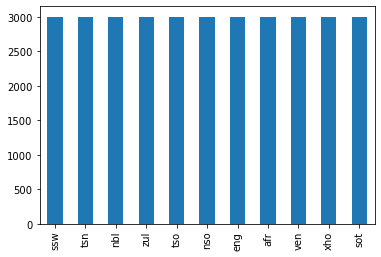

In [96]:
train_df['lang_id'].value_counts().plot(kind= 'bar')

In [97]:
def clean_text(text):
    
    text=re.sub('<.*?>', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub("\n"," ",text)
    text = text.lower()
    final=' '.join(text.split())
    return final

In [98]:
train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

In [99]:
def check_any_missed_spots(df):
    
    for col in df.columns:
        for item in df[col]:
            if ('.' in item) or ('\n' in item) :
                print(item)
               

In [100]:
check_any_missed_spots(train_df)


In [101]:
check_any_missed_spots(train_df)

In [102]:
X = train['text']
y = train['lang_id']

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

In [110]:
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid
modeltime = time.time()

final_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

final_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = final_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))
print("Model Runtime: %0.2f seconds"%((time.time() - modeltime)))


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       309
         eng       1.00      1.00      1.00       293
         nbl       1.00      0.99      0.99       291
         nso       1.00      1.00      1.00       309
         sot       1.00      1.00      1.00       323
         ssw       1.00      1.00      1.00       306
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       286
         ven       1.00      1.00      1.00       290
         xho       1.00      1.00      1.00       285
         zul       0.99      1.00      1.00       311

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Model Runtime: 7.31 seconds


In [106]:
svc = LinearSVC()

In [107]:
modeltime = time.time()

svc.fit(vect.transform(X_train), y_train)
y_pred = svc.predict(vect.transform(X_val))
print(metrics.classification_report(y_val, y_pred))
print("Model Runtime: %0.2f seconds"%((time.time() - modeltime)))


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       309
         eng       1.00      1.00      1.00       293
         nbl       1.00      0.99      0.99       291
         nso       1.00      1.00      1.00       309
         sot       1.00      1.00      1.00       323
         ssw       1.00      1.00      1.00       306
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       286
         ven       1.00      1.00      1.00       290
         xho       0.99      1.00      0.99       285
         zul       0.99      0.99      0.99       311

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Model Runtime: 1.91 seconds


In [116]:
submission_df = pd.DataFrame(test['index'])
submission_df['lang_id'] = final_mnb.predict(test['text'])
submission_df.to_csv('submission2.csv', index=False)

In [117]:
submission_df = pd.DataFrame(test_df['index'])
submission_df['lang_id'] = svc.predict(vect.transform(test_df['text']))
submission_df.to_csv('mbsubmission.csv', index=False)